data visualization

statistical graphing

In [1]:
#Task 1.0  import libraries 
#import pandas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
##import inforamtion from cleaned data from previous 
#Task 1.1  import csv file

UsedVehicle=pd.read_csv(r'.\Data\UsedCarData\clean_vehicles.csv', header=0 )

In [3]:
UsedVehicle.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,posting_date2
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.5920,-85.518900,2021-05-03T14:02:03-0500,2021-05-03
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,32.5900,-85.480000,2021-05-03T13:41:25-0500,2021-05-03
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al,32.5900,-85.480000,2021-05-03T12:41:33-0500,2021-05-03
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al,32.6013,-85.443974,2021-05-03T12:12:59-0500,2021-05-03
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al,32.5900,-85.480000,2021-05-03T11:31:14-0500,2021-05-03
5,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,rwd,other,red,al,32.5900,-85.480000,2021-05-03T07:50:35-0500,2021-05-03
6,auburn,32990,2017.0,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.0,clean,other,4wd,other,silver,al,32.5900,-85.480000,2021-05-02T12:22:10-0500,2021-05-02
7,auburn,37990,2016.0,chevrolet,camaro ss coupe 2d,good,8 cylinders,gas,9704.0,clean,other,rwd,coupe,red,al,32.5900,-85.480000,2021-05-01T12:21:51-0500,2021-05-01
8,auburn,27990,2018.0,nissan,frontier crew cab pro-4x,good,6 cylinders,gas,37332.0,clean,other,4wd,pickup,silver,al,32.5900,-85.480000,2021-05-01T09:11:35-0500,2021-05-01
9,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,pickup,blue,al,32.5475,-85.468200,2021-04-29T17:19:18-0500,2021-04-29


In [4]:
#Task 1.2

UsedVehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129883 entries, 0 to 129882
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   region         129883 non-null  object 
 1   price          129883 non-null  int64  
 2   year           129883 non-null  float64
 3   manufacturer   129883 non-null  object 
 4   model          129883 non-null  object 
 5   condition      129883 non-null  object 
 6   cylinders      129883 non-null  object 
 7   fuel           129883 non-null  object 
 8   odometer       129883 non-null  float64
 9   title_status   129883 non-null  object 
 10  transmission   129883 non-null  object 
 11  drive          129883 non-null  object 
 12  type           129883 non-null  object 
 13  paint_color    129883 non-null  object 
 14  state          129883 non-null  object 
 15  lat            129883 non-null  float64
 16  long           129883 non-null  float64
 17  posting_date   129883 non-nul

The 3 column that I think are useless are 
    id
    url
    region_url
    image_url
    
    
    

In [5]:
#Task 1.3
UsedVehicle.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,posting_date2
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.5920,-85.518900,2021-05-03T14:02:03-0500,2021-05-03
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,32.5900,-85.480000,2021-05-03T13:41:25-0500,2021-05-03
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al,32.5900,-85.480000,2021-05-03T12:41:33-0500,2021-05-03
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al,32.6013,-85.443974,2021-05-03T12:12:59-0500,2021-05-03
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al,32.5900,-85.480000,2021-05-03T11:31:14-0500,2021-05-03
5,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,rwd,other,red,al,32.5900,-85.480000,2021-05-03T07:50:35-0500,2021-05-03
6,auburn,32990,2017.0,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041.0,clean,other,4wd,other,silver,al,32.5900,-85.480000,2021-05-02T12:22:10-0500,2021-05-02
7,auburn,37990,2016.0,chevrolet,camaro ss coupe 2d,good,8 cylinders,gas,9704.0,clean,other,rwd,coupe,red,al,32.5900,-85.480000,2021-05-01T12:21:51-0500,2021-05-01
8,auburn,27990,2018.0,nissan,frontier crew cab pro-4x,good,6 cylinders,gas,37332.0,clean,other,4wd,pickup,silver,al,32.5900,-85.480000,2021-05-01T09:11:35-0500,2021-05-01
9,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,pickup,blue,al,32.5475,-85.468200,2021-04-29T17:19:18-0500,2021-04-29


In [6]:
#Task 1.4
UsedVehicle.describe()

,price,year,odometer,lat,long
count,1.298830e+05,129883.000000,1.298830e+05,129883.000000,129883.000000
mean,8.460142e+04,2008.978881,1.138283e+05,38.468165,-92.228412
std,1.499706e+07,10.419513,2.247545e+05,5.528921,17.417677
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.719900
25%,5.500000e+03,2006.000000,5.700000e+04,35.031300,-104.654790
50%,1.090000e+04,2011.000000,1.039730e+05,39.384750,-86.236592
75%,2.250000e+04,2015.000000,1.490000e+05,42.249000,-79.949997
max,3.736929e+09,2022.000000,1.000000e+07,82.252826,173.885502


In [7]:
#Task 2.0
#take a look what is 25%, 50% and 75% of credit of loan
# median loan 5995, 13991, 26500
np.percentile(UsedVehicle['price'],[25,50,75])

array([ 5500., 10900., 22500.])

In [8]:
#Task 3.1.0
UsedVehicle['region'].unique()

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'SF bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', 'denver', 'e

In [9]:
#Task 3.1.1

a=len(UsedVehicle['region'].unique())
print(a)

404


In [10]:
#Task 3.2.0

UsedVehicle['manufacturer'].unique()

array(['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'honda',
       'dodge', 'chrysler', 'ram', 'mercedes-benz', 'unknown', 'infiniti',
       'bmw', 'volkswagen', 'mazda', 'porsche', 'lexus', 'ferrari',
       'audi', 'mitsubishi', 'kia', 'pontiac', 'hyundai', 'fiat', 'acura',
       'cadillac', 'rover', 'lincoln', 'jaguar', 'saturn', 'volvo',
       'alfa-romeo', 'buick', 'subaru', 'mini', 'mercury', 'tesla',
       'harley-davidson', 'datsun', 'land rover', 'aston-martin'],
      dtype=object)

In [11]:
#Task 3.2.1


a=len(UsedVehicle['manufacturer'].unique())
print(a)

42


In [12]:
#Task 3.3.0
#there is 113 years of cars.  it might be intersting to find which vehicle 
#at which year sells the most car
UsedVehicle['year'].unique()

array([2013., 2012., 2016., 2019., 2011., 2017., 2018., 2004., 2001.,
       2014., 2003., 2008., 2007., 2005., 2020., 1966., 2006., 2010.,
       2009., 2002., 2015., 1995., 1979., 1974., 1996., 1987., 1955.,
       1972., 2021., 1994., 1999., 1988., 2000., 1984., 1998., 1992.,
       1958., 1978., 1976., 1991., 1953., 1963., 1968., 1997., 1993.,
       1990., 1982., 1948., 1986., 1983., 1951., 1936., 1980., 1989.,
       1967., 1981., 1985., 1973., 1947., 1962., 1975., 1964., 1977.,
       1971., 1970., 1946., 1969., 1957., 1959., 1930., 1965., 1928.,
       1954., 1933., 1952., 1929., 1932., 1956., 1950., 1924., 1960.,
       1927., 1939., 1923., 1934., 1940., 1961., 1935., 1942., 1918.,
       1938., 1949., 1900., 1931., 1926., 1937., 1913., 1941., 2022.,
       1925., 1945., 1901., 1905., 1944., 1920.])

In [13]:
#Task 3.3.1
a=len(UsedVehicle['year'].unique())
print(a)

105


In [14]:
#Task 3.4.0
#Looking at the different model it might be hard to find something interesting out of it
UsedVehicle['model'].unique()

array(['f-150 xlt', 'sierra 2500 hd extended cab',
       'silverado 1500 double', ..., 'rx& gls sport', 'gand wagoneer',
       'Paige Glenbrook Touring'], dtype=object)

In [15]:
#Task 3.4.1
a=len(UsedVehicle['model'].unique())
print(a)

14785


In [16]:
#Task 3.5.0
#Find which type of cars are the sold
#
UsedVehicle['condition'].unique()

array(['excellent', 'good', 'like new', 'new', 'fair', 'salvage'],
      dtype=object)

In [17]:
#Task 3.5.1
a=len(UsedVehicle['condition'].unique())
print(a)

6


In [18]:
#Task 3.6.0
#type of cars are being the class
UsedVehicle['fuel'].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [19]:
#Task 3.6.1
a=len(UsedVehicle['fuel'].unique())
print(a)

5


In [20]:
#Task 3.7.0
#type of car sold
UsedVehicle['title_status'].unique()

array(['clean', 'rebuilt', 'salvage', 'missing', 'lien', 'parts only'],
      dtype=object)

In [21]:
#Task 3.7.1
a=len(UsedVehicle['title_status'].unique())
print(a)

6


In [22]:
#Task 3.8.0
UsedVehicle['transmission'].unique()

array(['automatic', 'other', 'manual', 'unknown'], dtype=object)

In [23]:
#Task 3.8.1
a=len(UsedVehicle['transmission'].unique())
print(a)

4


In [24]:
#Task 3.9.0
UsedVehicle['drive'].unique()

array(['rwd', '4wd', 'fwd'], dtype=object)

In [25]:
#Task 3.9.1
a=len(UsedVehicle['drive'].unique())
print(a)

3


#Task 3.10
#verify this is correct
sns.lineplot(x=UsedVehicle['year'],y=UsedVehicle['price'].mean(), data =UsedVehicle)


In [28]:
#Task 3.11.0
UsedVehicle['type'].unique()

array(['truck', 'pickup', 'other', 'coupe', 'mini-van', 'SUV', 'sedan',
       'offroad', 'bus', 'van', 'convertible', 'unknown', 'hatchback',
       'wagon'], dtype=object)

In [29]:
#Task 3.11.1
UsedVehicle_new02=UsedVehicle.groupby(['type','year'])['price'].mean()
UsedVehicle_new02

type   year  
SUV    1900.0    38250.000000
       1946.0     8000.000000
       1955.0    12500.000000
       1957.0     2500.000000
       1959.0    17500.000000
                     ...     
wagon  2017.0    20310.209302
       2018.0    11606.109489
       2019.0    24060.772727
       2020.0    26849.454545
       2021.0    30995.000000
Name: price, Length: 1029, dtype: float64

In [30]:
#Task 3.11.2
a=len(UsedVehicle['type'].unique())
print(a)

14


There are 14 type of cars. i want to see what is average price
From below the least expesnive is hatchback. 1/4 of data is unknown ['type'] of vehicle

In [31]:
#Task 3.11.3
UsedVehicle_new02=UsedVehicle.groupby(['type'])['price'].mean()
UsedVehicle_new02

type
SUV             13499.785301
bus             17387.722222
convertible     17047.322641
coupe           20482.105021
hatchback        8528.266509
mini-van         8936.636169
offroad         16385.389432
other           27363.403788
pickup         409530.501355
sedan           14055.911622
truck           29845.644015
unknown        412947.133533
van             16554.883754
wagon           10125.583175
Name: price, dtype: float64

In [32]:
#Task 3.12.0
UsedVehicle['paint_color'].unique()

array(['black', 'silver', 'grey', 'red', 'blue', 'white', 'brown',
       'yellow', 'green', 'custom', 'purple', 'orange'], dtype=object)

In [33]:
#Task 3.12.1
a=len(UsedVehicle['paint_color'].unique())
print(a)

12


In [36]:
#Task 3.14.0
UsedVehicle['state'].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [37]:
#Task 3.14.1
a=len(UsedVehicle['state'].unique())
print(a)

51


there is 51 states and there are only 50 states.  I figured out they used DC as a state.  I will also compare what stated vs type of cars sold

In [ ]:
#Task 3.14.2


In [38]:
#Task 3.14.3
UsedVehicle.groupby(['type'])['state'].value_counts().unstack(0)

type,SUV,bus,convertible,coupe,hatchback,mini-van,offroad,other,pickup,sedan,truck,unknown,van,wagon
state,,,,,,,,,,,,,,
ak,282.0,NaN,10.0,35.0,43.0,34.0,13.0,5.0,67.0,237.0,176.0,53.0,17.0,24.0
al,297.0,6.0,53.0,89.0,34.0,24.0,5.0,72.0,172.0,279.0,278.0,80.0,70.0,12.0
ar,237.0,2.0,23.0,87.0,42.0,17.0,6.0,44.0,124.0,223.0,187.0,220.0,23.0,10.0
az,493.0,5.0,82.0,193.0,75.0,59.0,28.0,104.0,303.0,620.0,326.0,201.0,74.0,35.0
ca,2665.0,24.0,405.0,1124.0,627.0,253.0,100.0,480.0,1336.0,4154.0,1496.0,813.0,324.0,344.0
co,802.0,10.0,68.0,167.0,109.0,38.0,25.0,70.0,242.0,566.0,305.0,355.0,65.0,83.0
ct,266.0,1.0,61.0,108.0,110.0,30.0,6.0,85.0,215.0,469.0,150.0,133.0,27.0,62.0
dc,156.0,3.0,29.0,55.0,42.0,19.0,2.0,33.0,62.0,270.0,51.0,63.0,24.0,42.0
de,75.0,1.0,15.0,30.0,6.0,8.0,1.0,4.0,21.0,126.0,75.0,49.0,4.0,17.0


In [39]:
#Task 3.15.0
UsedVehicle['posting_date2'].unique()

array(['2021-05-03', '2021-05-02', '2021-05-01', '2021-04-29',
       '2021-04-27', '2021-04-26', '2021-04-25', '2021-04-24',
       '2021-04-23', '2021-04-21', '2021-04-18', '2021-04-17',
       '2021-04-16', '2021-04-15', '2021-04-13', '2021-04-12',
       '2021-04-11', '2021-04-10', '2021-04-09', '2021-04-08',
       '2021-05-04', '2021-04-30', '2021-04-28', '2021-04-22',
       '2021-04-20', '2021-04-19', '2021-04-14', '2021-04-07',
       '2021-04-06', '2021-04-05', '2021-04-04'], dtype=object)

In [40]:
#Task 3.15.1
a=len(UsedVehicle['posting_date2'].unique())
print(a)

31


<AxesSubplot:>

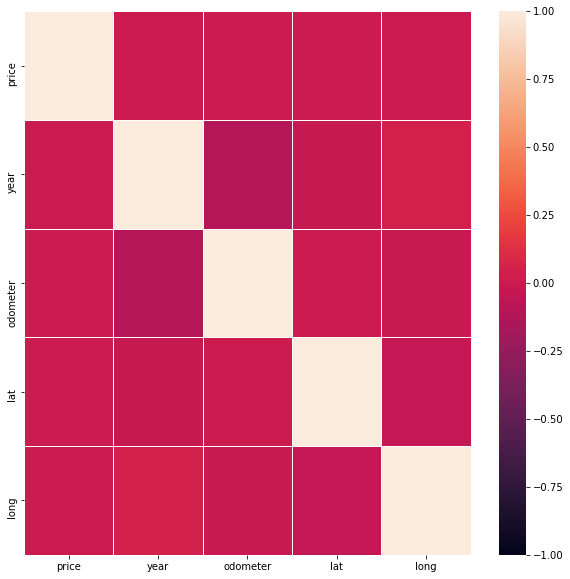

In [41]:
#Task 4.0
#test data to see correlation mapping
#Heat map with columns that are floats or int.  It will not work with str.
#adjust the scale so i can see anything that has correation greater than 0.  
#Previous chart with -1 to 1 was difficult to distinguest correlation

UsedVehicle_corr=UsedVehicle.corr()
fig,ax  =plt.subplots(figsize = (10,10))
sns.heatmap(UsedVehicle_corr, linewidth=.5,ax=ax, vmin=-1,vmax=1)

Looking at price / odometer and odometer / year

In [42]:
#Task 4.1
UsedVehicle[['odometer','year','price']].describe()

,odometer,year,price
count,1.298830e+05,129883.000000,1.298830e+05
mean,1.138283e+05,2008.978881,8.460142e+04
std,2.247545e+05,10.419513,1.499706e+07
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.700000e+04,2006.000000,5.500000e+03
50%,1.039730e+05,2011.000000,1.090000e+04
75%,1.490000e+05,2015.000000,2.250000e+04
max,1.000000e+07,2022.000000,3.736929e+09


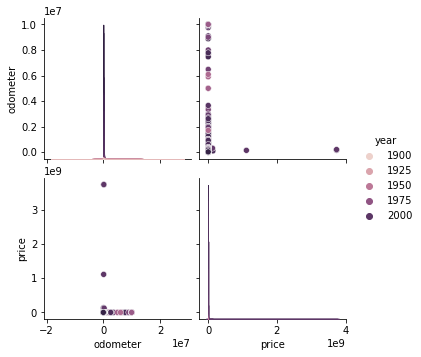

In [43]:
#Task 5.1
#seaborn pair plot
df1 = UsedVehicle[['odometer','year','price']]
sns.pairplot(df1, hue='year')



#Task 5.2
#not so interesting as previous chart

df2 = UsedVehicle[['odometer','year','price']]
sns.pairplot(df2, hue='price')



<AxesSubplot:xlabel='odometer'>

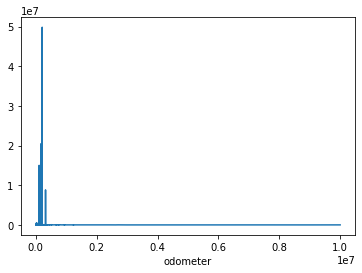

In [45]:
#Task 5.3.0
#
UsedVehicle.groupby('odometer')['price'].mean().plot()


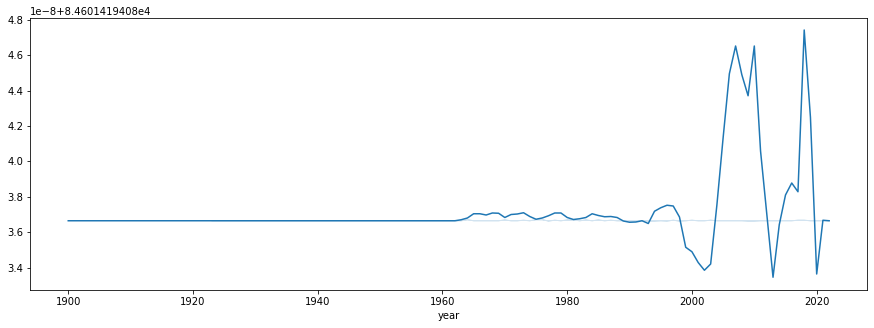

In [48]:
#Task 5.3.1
#not correct
#box plot
plt.figure(figsize = (15,5))
#group by year then price.mean()
sns.lineplot(x=UsedVehicle['year'] ,y=UsedVehicle['price'].mean());
plt.show()

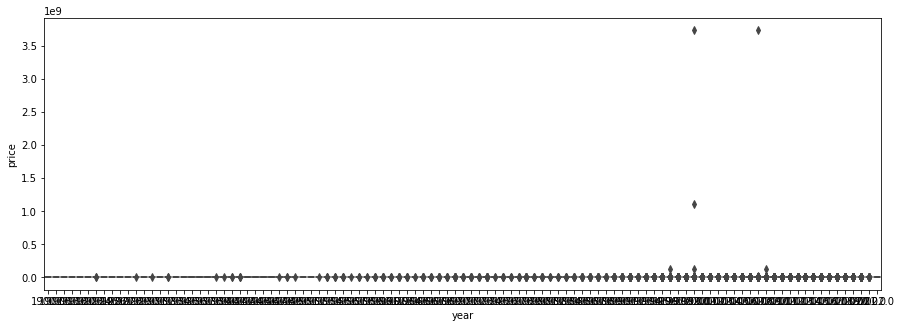

In [49]:
#Task 5.4
#box plot
#can skip because hard read, delete
plt.figure(figsize = (15,5))
sns.boxplot(x=UsedVehicle['year'] ,y=UsedVehicle['price']);
plt.show()

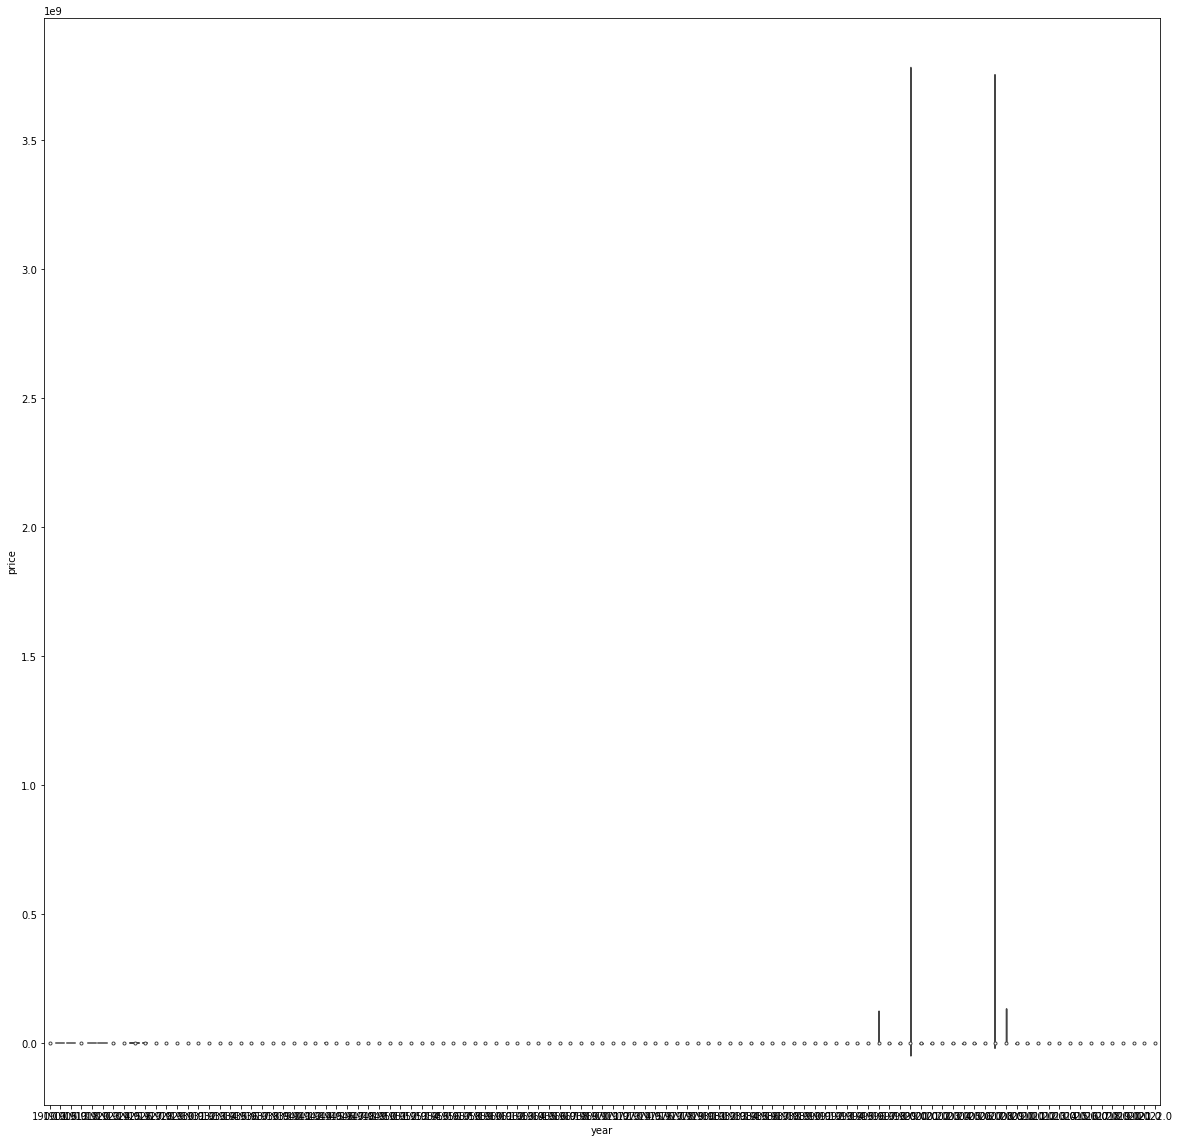

In [50]:
#Task 5.6

#Violin Plot

#aasize =(20,20)
#group by year then price.mean()

fig,ax=plt.subplots()
fig.set_size_inches(20,20)
sns.violinplot(x=UsedVehicle['year'] ,y=UsedVehicle['price'], ax =ax );
plt.show()

In [51]:
#Task 6.0
#group up category and graphy by price

UsedVehicle

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,posting_date2
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592000,-85.518900,2021-05-03T14:02:03-0500,2021-05-03
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,32.590000,-85.480000,2021-05-03T13:41:25-0500,2021-05-03
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al,32.590000,-85.480000,2021-05-03T12:41:33-0500,2021-05-03
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al,32.601300,-85.443974,2021-05-03T12:12:59-0500,2021-05-03
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al,32.590000,-85.480000,2021-05-03T11:31:14-0500,2021-05-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129878,wyoming,25590,2017.0,unknown,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,37608.0,clean,automatic,rwd,sedan,white,wy,33.786500,-84.445400,2021-04-05T02:50:20-0600,2021-04-05
129879,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,wy,33.779214,-84.411811,2021-04-05T02:41:26-0600,2021-04-05
129880,wyoming,0,2010.0,toyota,venza,excellent,6 cylinders,gas,155000.0,clean,automatic,4wd,unknown,blue,wy,40.114685,-104.971971,2021-04-04T17:00:48-0600,2021-04-04
129881,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,rwd,sedan,white,wy,33.779214,-84.411811,2021-04-04T03:21:34-0600,2021-04-04


In [55]:
#Task 6.1.0
#TOP 5 color 
#Move Comment down here
# white     32300
# black     24264     
# silver    18392    
# red       14080
# blue      14033

UsedVehicle.groupby('paint_color')['paint_color'].count()

paint_color
black     24264
blue      14033
brown      3643
custom     2846
green      4285
grey      13579
orange      836
purple      413
red       14080
silver    18392
white     32300
yellow     1212
Name: paint_color, dtype: int64

In [56]:
#Task  6.1.1
#UsedVehicle_new=UsedVehicle.groupby('size')['price'].mean()
#paint_color


white = UsedVehicle[UsedVehicle['paint_color']=='white']
black = UsedVehicle[UsedVehicle['paint_color']=='black']
silver = UsedVehicle[UsedVehicle['paint_color']=='silver']
red = UsedVehicle[UsedVehicle['paint_color']=='red']
blue = UsedVehicle[UsedVehicle['paint_color']=='blue']


In [57]:
white1= white.groupby('year')['price'].mean()
black1= black.groupby('year')['price'].mean()
silver1= silver.groupby('year')['price'].mean()
red1= red.groupby('year')['price'].mean()
blue1= blue.groupby('year')['price'].mean()




In [60]:
#Task  6.1.2
white1
#dataComp=white1.groupby('paint_color')['price'].mean()
#dataComp

year
1905.0     3990.000000
1927.0     8000.000000
1931.0    22500.000000
1934.0    32500.000000
1937.0    27700.000000
              ...     
2018.0    28782.796244
2019.0    33304.877678
2020.0    36504.575025
2021.0    39796.183099
2022.0     1166.666667
Name: price, Length: 82, dtype: float64

In [ ]:
#Task  6.1.3



<AxesSubplot:xlabel='year'>

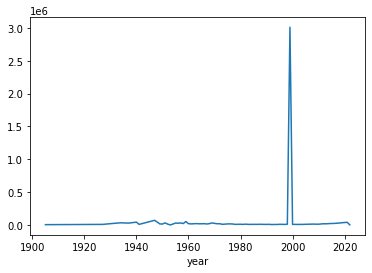

In [61]:
white1.plot()

<AxesSubplot:xlabel='year'>

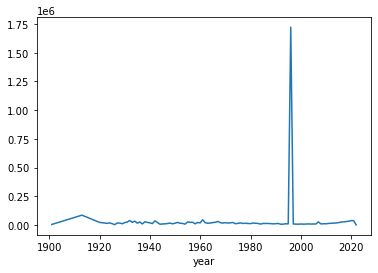

In [62]:
black1.plot()

<AxesSubplot:xlabel='year'>

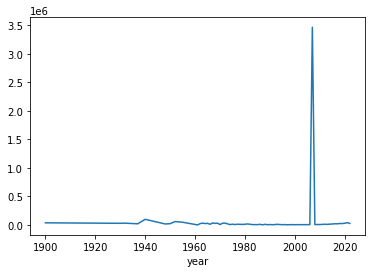

In [63]:
silver1.plot()

<AxesSubplot:xlabel='year'>

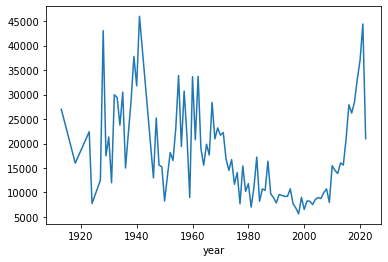

In [64]:
red1.plot()

<AxesSubplot:xlabel='year'>

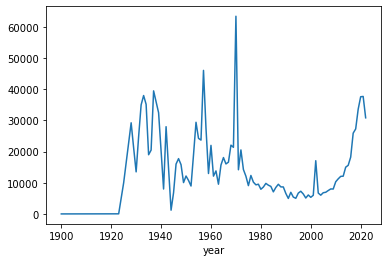

In [65]:
blue1.plot()

Filter by Type to compare price

There are the following type of vehicles but we will go for top 4-5 types
'pickup', 
'truck', 
'other', 
'unknown', 
'coupe', 
'SUV', 
'hatchback',
'mini-van',
'sedan', 
'offroad', 
'bus', 
'van', 
'convertible',
'wagon']

I will choose trucks, SUV, mini-van,sedan and pickup.  Below is count of each type

In [66]:
#Task  6.2.0
UsedVehicle.groupby('type')['type'].count()

type
SUV            28030
bus              234
convertible     3741
coupe           8903
hatchback       4664
mini-van        2798
offroad          511
other           3326
pickup         12915
sedan          31931
truck          16835
unknown         9361
van             3484
wagon           3150
Name: type, dtype: int64

In [67]:
#Task  6.2.1

UsedVehicle[['type','price']]

,type,price
0,truck,15000
1,pickup,27990
2,pickup,34590
3,truck,35000
4,pickup,29990
...,...,...
129878,sedan,25590
129879,other,32990
129880,unknown,0
129881,sedan,33590


In [68]:
#Task  6.2.2
    
SUV = UsedVehicle[UsedVehicle['type']=='SUV']
MINI = UsedVehicle[UsedVehicle['type']=='mini-van']
PICKUP = UsedVehicle[UsedVehicle['type']=='pickup']
SEDAN = UsedVehicle[UsedVehicle['type']=='sedan']
TRUCK = UsedVehicle[UsedVehicle['type']=='truck']


In [69]:
#Task  6.2.3
#need to select a different type as there is 
#~ 8.4% is zero

a=  len (SUV[SUV['price']==0])
b = len(SUV['price'])
print('Price is zero: '+ str(a))
print ('Total SUV count: '+ str(b))
print(a/b)

Price is zero: 1212
Total SUV count: 28030
0.043239386371744556


In [70]:
 #Task  6.2.4
suv1=SUV.groupby('year')['price'].mean()
suv1

year
1900.0    38250.000000
1946.0     8000.000000
1955.0    12500.000000
1957.0     2500.000000
1959.0    17500.000000
              ...     
2018.0    27270.586649
2019.0    27226.593625
2020.0    33008.559767
2021.0    35058.364865
2022.0    29287.500000
Name: price, Length: 65, dtype: float64

<AxesSubplot:xlabel='year'>

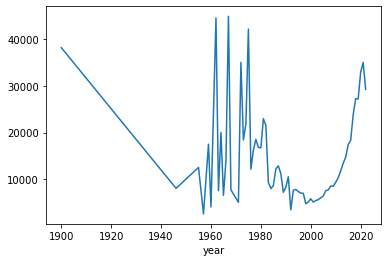

In [71]:
#Task  6.2.5
suv1.plot()

In [72]:
#Task  6.2.5
a=  len (MINI[MINI['price']==0])
b = len(MINI['price'])
print('Price is zero: '+ str(a))
print ('Total MINI count: '+ str(b))
print(a/b)

Price is zero: 105
Total MINI count: 2798
0.03752680486061472


In [73]:
#Task  6.2.6
mini1 =MINI.groupby('year')['price'].mean()
mini1

year
1956.0    29000.000000
1971.0     6500.000000
1980.0     2250.000000
1987.0    16062.500000
1989.0      500.000000
1990.0     3000.000000
1991.0      700.000000
1992.0    10747.000000
1993.0     9622.500000
1994.0     1769.000000
1995.0    10286.272727
1996.0     2862.666667
1997.0     2050.000000
1998.0     3896.904762
1999.0     3088.961538
2000.0     3700.000000
2001.0     3733.186047
2002.0     3065.887097
2003.0     3685.346667
2004.0     4156.169492
2005.0     3811.552326
2006.0     5221.031414
2007.0     4803.395122
2008.0     5321.158798
2009.0     6031.031579
2010.0     6513.510870
2011.0     9029.190184
2012.0     9659.161905
2013.0     9488.367521
2014.0    11024.485714
2015.0    12631.985915
2016.0    14119.525974
2017.0    17653.301075
2018.0    20222.430380
2019.0    23145.433333
2020.0    37420.814815
2021.0     8946.250000
Name: price, dtype: float64

<AxesSubplot:xlabel='year'>

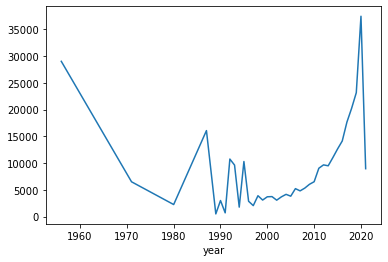

In [74]:
#Task  6.2.7
mini1.plot()


In [75]:
#Task  6.2.7
a=  len (PICKUP[PICKUP['price']==0])
b = len(PICKUP['price'])
print('Price is zero: '+ str(a))
print ('Total PICKUP count: '+ str(b))
print(a/b)

Price is zero: 345
Total PICKUP count: 12915
0.026713124274099883


In [76]:
#Task  6.2.9
pickup1 = PICKUP.groupby('year')['price'].mean()
pickup1


year
1923.0    25000.000000
1925.0    10000.000000
1927.0     3700.000000
1928.0    30833.333333
1929.0    10300.000000
              ...     
2017.0    32641.279959
2018.0    35271.441055
2019.0    39977.879041
2020.0    42705.655949
2021.0    51770.105263
Name: price, Length: 92, dtype: float64

<AxesSubplot:xlabel='year'>

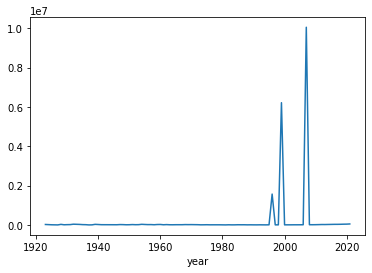

In [77]:
#Task  6.2.10
pickup1.plot()

In [78]:
#Task  6.2.11
a=  len (SEDAN[SEDAN['price']==0])
b = len(SEDAN['price'])
print('Price is zero: '+ str(a))
print ('Total SEDAN count: '+ str(b))
print(a/b)

Price is zero: 1023
Total SEDAN count: 31931
0.032037831574332154


In [79]:
sedan1 = SEDAN.groupby('year')['price'].mean()
sedan1

year
1924.0    22000.000000
1927.0    10333.333333
1928.0    31416.666667
1929.0    21975.000000
1930.0    18600.000000
              ...     
2017.0    16638.239669
2018.0    19330.255831
2019.0    24247.832061
2020.0    28512.968379
2021.0    22466.666667
Name: price, Length: 93, dtype: float64

<AxesSubplot:xlabel='year'>

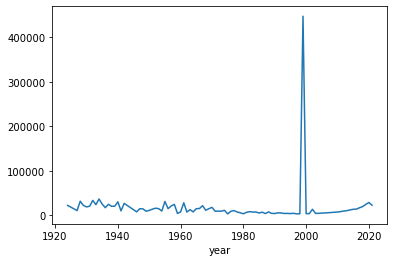

In [80]:
#Task  6.2.10
sedan1.plot()

In [81]:
#Task  6.2.11
a=  len (TRUCK[TRUCK['price']==0])
b = len(TRUCK['price'])
print('Price is zero: '+ str(a))
print ('Total TRUCK count: '+ str(b))
print(a/b)

Price is zero: 1001
Total TRUCK count: 16835
0.05945945945945946


In [82]:
truck1=  TRUCK.groupby('year')['price'].mean()

<AxesSubplot:xlabel='year'>

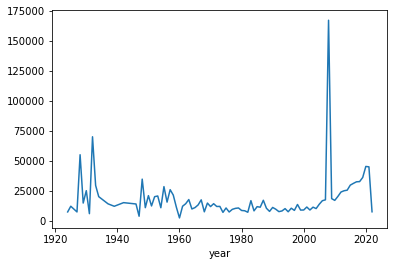

In [83]:
#Task  6.2.12
truck1.plot()

Hypothesis Testing

In [84]:
#Task 7.0.0
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [85]:
#Task 7.1.0
gmcvehicle=UsedVehicle[UsedVehicle['manufacturer']== 'gmc']

In [86]:
#Task 7.1.1
gmcvehicle.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,posting_date2
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,32.5900,-85.480,2021-05-03T13:41:25-0500,2021-05-03
20,auburn,36590,2019.0,gmc,sierra 1500 limited double,good,8 cylinders,gas,14222.0,clean,other,4wd,pickup,blue,al,32.5900,-85.480,2021-04-18T11:21:35-0500,2021-04-18
26,auburn,28590,2018.0,gmc,acadia sle-2 sport utility,good,6 cylinders,gas,20736.0,clean,other,fwd,SUV,white,al,32.5900,-85.480,2021-04-15T11:00:40-0500,2021-04-15
63,birmingham,12500,2008.0,gmc,yukon xl,excellent,8 cylinders,gas,177326.0,clean,automatic,rwd,SUV,black,al,33.5554,-86.887,2021-05-03T15:46:48-0500,2021-05-03
65,birmingham,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,33.5200,-86.790,2021-05-03T14:21:01-0500,2021-05-03


In [87]:
#Task 7.1.2
ANOVData=gmcvehicle[['model','price']]

In [88]:
#Task 7.1.3
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=ANOVData, res_var='price', anova_model='price ~ C(model)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(model),552.0,4.193105e+14,7.596205e+11,0.236418,1.0
Residual,4611.0,1.481531e+16,3.213036e+12,NaN,NaN


In [89]:
#Task 7.2.1
ford=UsedVehicle[UsedVehicle['manufacturer']== 'ford']

In [90]:
#Task 7.2.2
FordData=ford[['model','price']]

In [91]:
#Task 7.2.3
res = stat()
res.anova_stat(df=FordData, res_var='price', anova_model='price ~ C(model)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(model),1925.0,5.611312e+16,2.914967e+13,0.512014,1.0
Residual,20698.0,1.178367e+18,5.693143e+13,NaN,NaN


In [92]:
#Task 7.3.1
toyata=UsedVehicle[UsedVehicle['manufacturer']== 'toyota']

In [93]:
#Task 7.3.2
ToyotaData=toyata[['model','price']]

In [94]:
#Task 7.3.3
res = stat()
res.anova_stat(df=ToyotaData, res_var='price', anova_model='price ~ C(model)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(model),828.0,6.468797e+16,7.812557e+13,0.027984,1.0
Residual,9979.0,2.785922e+19,2.791784e+15,NaN,NaN


All the P